In [18]:
!pip install --user mysql-connector-python

In [14]:
# To check your current working environment
import sys
print(sys.executable)

C:\ProgramData\anaconda3\python.exe


In [ ]:
# TO INSTALL mysql-connector TO YOUR ENVIRONMENT (IF ABOVE STEPS WON'T WORK)
""" 
1. Close Jupyter Notebook and Anaconda Navigator (if open).
2. Open the Start Menu and search for:
    * Anaconda Prompt
    * Right-click → Run as Administrator.
3. Then, install the package
    conda install -c anaconda mysql-connector-python -y
4. Restart Jupyter Notebook and check if the issue is resolved.
"""

In [73]:
import pandas as pd
import mysql.connector
print("MySQL Connector is installed successfully!")
import matplotlib.pyplot as plt 
import seaborn as sns

MySQL Connector is installed successfully!


In [2]:
# LOAD CSV FILE
df = pd.read_csv('C:\\Users\\wankh\\Desktop\\Datasets\\PORTFOLIO PROJ DATASETS\\layoffs.csv')


In [8]:
df.head(10)

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,Blue Origin,Seattle,Aerospace,1000.0,0.10,2025-02-13,Unknown,United States,167.0
1,Sophos,Oxford,Security,NaN,0.06,2025-02-13,Acquired,United States,125.0
2,Zepz,London,Finance,200.0,0.20,2025-02-12,Series E,United Kingdom,700.0
3,Getaround,SF Bay Area,Transportation,NaN,NaN,2025-02-12,Series D,United States,403.0
4,Unity,SF Bay Area,Other,NaN,NaN,2025-02-11,Post-IPO,United States,1300.0
5,Meta,SF Bay Area,Consumer,3600.0,0.05,2025-02-10,Post-IPO,United States,26000.0
6,Justworks,New York City,HR,200.0,NaN,2025-02-10,Unknown,United States,160.0
7,MessageBird,Amsterdam,Other,120.0,0.33,2025-02-10,Series C,Netherlands,1100.0
8,Sprinklr,New York City,Support,500.0,0.15,2025-02-06,Post-IPO,United States,429.0
9,Workday,SF Bay Area,HR,1750.0,0.08,2025-02-05,Post-IPO,United States,230.0


In [9]:
# CONNECT TO MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="mysqlroot",
    database="world_layoffs"    # name of databse you are going to use in MySQL Workbench
)
cursor = conn.cursor()

In [12]:
# Before Inserting data into MySQL, create table (Table Name: layoffs), with it's schema(all columns with datatypes) in the mentioned database (world_layoffs)

# INSERT DATA
for index, row in df.iterrows():
    cursor.execute(
        "INSERT INTO layoffs (company, location, industry, total_laid_off, percentage_laid_off, date, stage, country, funds_raised) VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s)",
        (row['company'], row['location'], row['industry'], row['total_laid_off'], row['percentage_laid_off'], row['date'], row['stage'], row['country'], row['funds_raised'])
    )
    
conn.commit()
cursor.close()
conn.close()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              3294 non-null   object 
 1   location             3293 non-null   object 
 2   industry             3293 non-null   object 
 3   total_laid_off       2083 non-null   float64
 4   percentage_laid_off  2098 non-null   float64
 5   date                 3294 non-null   object 
 6   stage                3287 non-null   object 
 7   country              3294 non-null   object 
 8   funds_raised         2914 non-null   float64
dtypes: float64(3), object(6)
memory usage: 231.7+ KB


In [16]:
# DATA CLEANING
# First convert Date column
df['date'] = pd.to_datetime(df['date'])

# Handling Missing Values present in "total_laid_off" and "percentage_laid_off"
df['total_laid_off'].fillna(0, inplace = True)
df['percentage_laid_off'].fillna(df['percentage_laid_off'].median(), inplace = True)

In [18]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company              3294 non-null   object        
 1   location             3293 non-null   object        
 2   industry             3293 non-null   object        
 3   total_laid_off       3294 non-null   float64       
 4   percentage_laid_off  3294 non-null   float64       
 5   date                 3294 non-null   datetime64[ns]
 6   stage                3287 non-null   object        
 7   country              3294 non-null   object        
 8   funds_raised         2914 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 231.7+ KB


,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,Blue Origin,Seattle,Aerospace,1000.0,0.10,2025-02-13,Unknown,United States,167.0
1,Sophos,Oxford,Security,0.0,0.06,2025-02-13,Acquired,United States,125.0
2,Zepz,London,Finance,200.0,0.20,2025-02-12,Series E,United Kingdom,700.0
3,Getaround,SF Bay Area,Transportation,0.0,0.16,2025-02-12,Series D,United States,403.0
4,Unity,SF Bay Area,Other,0.0,0.16,2025-02-11,Post-IPO,United States,1300.0
5,Meta,SF Bay Area,Consumer,3600.0,0.05,2025-02-10,Post-IPO,United States,26000.0
6,Justworks,New York City,HR,200.0,0.16,2025-02-10,Unknown,United States,160.0
7,MessageBird,Amsterdam,Other,120.0,0.33,2025-02-10,Series C,Netherlands,1100.0
8,Sprinklr,New York City,Support,500.0,0.15,2025-02-06,Post-IPO,United States,429.0
9,Workday,SF Bay Area,HR,1750.0,0.08,2025-02-05,Post-IPO,United States,230.0


In [25]:
#=============== TO FIND LAYOFF TRENDS OVER TIME ==================
# Needs "matplotlib.pyplot"

df['month'] = df['date'].dt.to_period('M')   
layoffs_trend = df.groupby('month')['total_laid_off'].sum() 
layoffs_trend

month
2022-01      510.0
2022-02     3685.0
2022-03     5714.0
2022-04     4128.0
2022-05    12985.0
2022-06    18144.0
2022-07    16238.0
2022-08    13055.0
2022-09     5881.0
2022-10    20671.0
2022-11    53594.0
2022-12    10664.0
2023-01    89709.0
2023-02    39902.0
2023-03    37963.0
2023-04    20100.0
2023-05    15127.0
2023-06    11206.0
2023-07    10690.0
2023-08    10178.0
2023-09     4707.0
2023-10     8076.0
2023-11     8373.0
2023-12     8189.0
2024-01    34137.0
2024-02    15729.0
2024-03     7403.0
2024-04    22423.0
2024-05    11011.0
2024-06    10083.0
2024-07     9051.0
2024-08    25944.0
2024-09     3941.0
2024-10     3659.0
2024-11     6455.0
2024-12     2268.0
2025-01     2403.0
2025-02    10460.0
Freq: M, Name: total_laid_off, dtype: float64

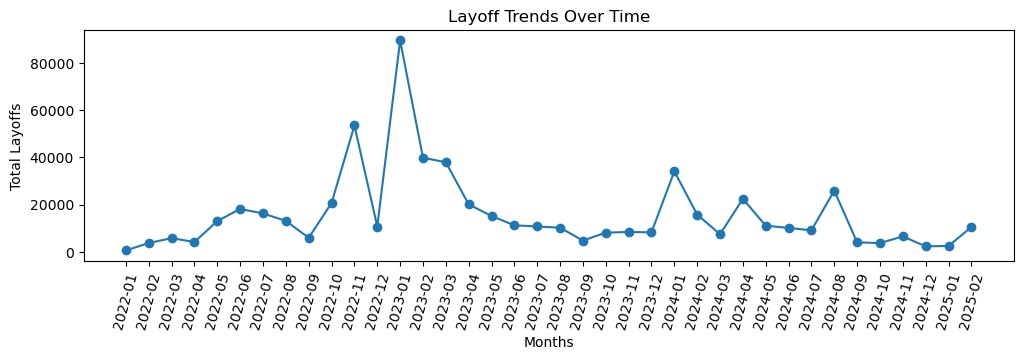

In [68]:
plt.figure(figsize = (12,3))
plt.plot(layoffs_trend.index.astype(str), layoffs_trend.values, marker = 'o', linestyle = '-')
plt.xticks(rotation = 75)
plt.title("Layoff Trends Over Time")
plt.xlabel("Months")
plt.ylabel("Total Layoffs")
plt.show()

In [39]:
# =============== TO IDENTIFY COMPANIES WITH Layoffs in CONSECUTIVE MONTHS =====================
# First sort data by company and date
layoffs = df.sort_values( by = ['company', 'date'])
layoffs


,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,month
2087,E Inc.,Toronto,Transportation,0.0,0.16,2022-12-16,Post-IPO,Canada,NaN,2022-12
817,F-Secure,Helsinki,Security,70.0,0.16,2023-10-25,Post-IPO,Finland,NaN,2023-10
2831,Included Health,SF Bay Area,Healthcare,0.0,0.06,2022-07-25,Series E,United States,272.0,2022-07
1826,#Paid,Toronto,Marketing,19.0,0.17,2023-01-27,Series B,Canada,21.0,2023-01
2286,&Open,Dublin,Marketing,9.0,0.09,2022-11-17,Series A,Ireland,35.0,2022-11
...,...,...,...,...,...,...,...,...,...,...
112,iRobot,Boston,Consumer,105.0,0.16,2024-11-06,Post-IPO,United States,30.0,2024-11
947,iSpecimen,Boston,Healthcare,0.0,0.20,2023-09-06,Post-IPO,United States,31.0,2023-09
1063,inDrive,SF Bay Area,Transportation,0.0,0.10,2023-08-01,Unknown,United States,387.0,2023-08
952,mPharma,Accra,Healthcare,150.0,0.16,2023-09-04,Series D,Ghana,90.0,2023-09


In [71]:
# Check for layoffs in consecutive months
layoffs['prev_month'] = layoffs.groupby('company')['date'].shift(1)
layoffs['consecutive'] = (layoffs['date'] - layoffs['prev_month']).dt.days <=31  #checks if the difference between consecutive layoffs is one month or less

layoffs.tail(5)


,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,month,prev_month,consecutive
112,iRobot,Boston,Consumer,105.0,0.16,2024-11-06,Post-IPO,United States,30.0,2024-11,2024-01-29,False
947,iSpecimen,Boston,Healthcare,0.0,0.20,2023-09-06,Post-IPO,United States,31.0,2023-09,NaT,False
1063,inDrive,SF Bay Area,Transportation,0.0,0.10,2023-08-01,Unknown,United States,387.0,2023-08,NaT,False
952,mPharma,Accra,Healthcare,150.0,0.16,2023-09-04,Series D,Ghana,90.0,2023-09,NaT,False
1916,nCino,Wilmington,Finance,100.0,0.07,2023-01-18,Post-IPO,United States,1100.0,2023-01,NaT,False


In [69]:
# Filter companies with consecutive layoffs
consecutive_layoffs = layoffs[layoffs['consecutive']]  # filters the dataset to include only the rows where consecutive is True
consecutive_layoffs.head(5)


,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,month,prev_month,consecutive
2290,Amazon,Seattle,Retail,10000.0,0.03,2022-11-16,Post-IPO,United States,108.0,2022-11,2022-10-28,True
779,Amazon,Seattle,Retail,180.0,0.16,2023-11-13,Post-IPO,United States,108.0,2023-11,2023-11-08,True
760,Amazon,Seattle,Retail,0.0,0.16,2023-11-17,Post-IPO,United States,108.0,2023-11,2023-11-13,True
608,Amazon,Seattle,Retail,30.0,0.16,2024-01-18,Post-IPO,United States,108.0,2024-01,2024-01-10,True
534,Amazon,Seattle,Retail,400.0,0.16,2024-02-06,Post-IPO,United States,108.0,2024-02,2024-01-18,True


In [72]:
print(" \n\t\t Companies with layoffs in consecutive months: \n")
consecutive_layoffs[['company', 'industry', 'date', 'prev_month']]


 
		 Companies with layoffs in consecutive months: 



,company,industry,date,prev_month
2290,Amazon,Retail,2022-11-16,2022-10-28
779,Amazon,Retail,2023-11-13,2023-11-08
760,Amazon,Retail,2023-11-17,2023-11-13
608,Amazon,Retail,2024-01-18,2024-01-10
534,Amazon,Retail,2024-02-06,2024-01-18
...,...,...,...,...
560,The Messenger,Media,2024-01-31,2024-01-02
3195,Vedantu,Education,2022-05-18,2022-05-05
2471,Volta,Transportation,2022-10-21,2022-09-28
1233,Western Digital,Hardware,2023-06-13,2023-05-24


In [90]:
#=============== TO FIND Total Funds Raised OVER TIME ==================
# Needs "matplotlib.pyplot"

layoffs['year'] = layoffs['date'].dt.to_period('Y')   
# funds_raised = layoffs.groupby('year')['funds_raised'].sum()  # to calculate total funds raised in each year
funds_raised = layoffs.groupby('month')['funds_raised'].sum()    # to calculate total funds raised in each month
                # groupby() creates data into index and value pair. Ex:- In this case index = "2022-01" and value = 4210.0
funds_raised

month
2022-01      4210.0
2022-02      4089.0
2022-03     18725.0
2022-04    137422.0
2022-05    153457.0
2022-06    212139.0
2022-07     76544.0
2022-08     55485.0
2022-09    189361.0
2022-10     42523.0
2022-11    146449.0
2022-12     61103.0
2023-01    161328.0
2023-02    118728.0
2023-03    101478.0
2023-04     43079.0
2023-05     27597.0
2023-06    100187.2
2023-07     29918.0
2023-08     29808.0
2023-09     34825.0
2023-10     56188.0
2023-11     47841.2
2023-12     62583.0
2024-01     96622.0
2024-02     49538.3
2024-03     38155.0
2024-04     85435.0
2024-05     50014.0
2024-06     33216.0
2024-07     25165.0
2024-08     13634.2
2024-09     30574.0
2024-10     48347.0
2024-11     16798.3
2024-12     10998.0
2025-01     22622.0
2025-02     49203.2
Freq: M, Name: funds_raised, dtype: float64

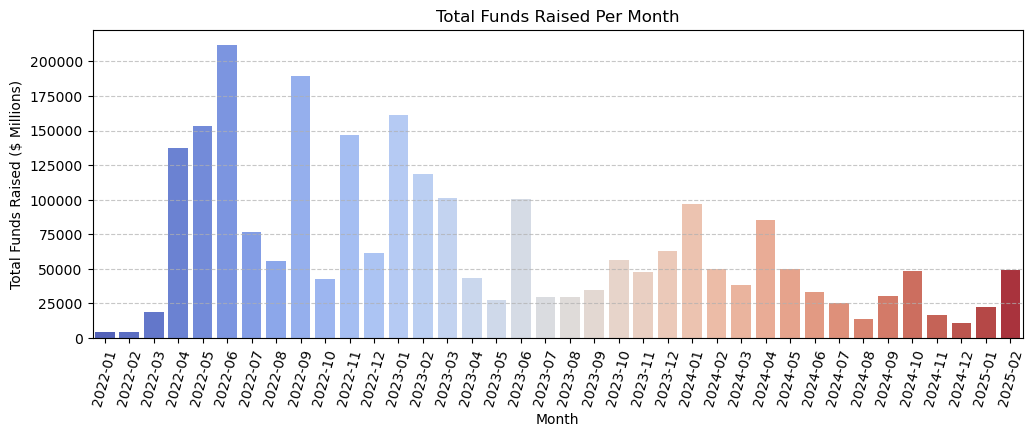

In [91]:
# Converting index to string for better visualization
funds_raised.index = funds_raised.index.astype(str)

# Plotting Bar Chart
plt.figure(figsize = (12, 4))
sns.barplot(x = funds_raised.index, y = funds_raised.values, palette = "coolwarm")

# Customizing the plot
plt.title("Total Funds Raised Per Month")
plt.xlabel("Month")
plt.ylabel("Total Funds Raised ($ Millions)")
plt.xticks(rotation=75)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [100]:
# ============================ Industry Layoffs Year-over-Year Comparison ==========================

# Extract year from the date
layoffs['year'] = layoffs['date'].dt.year   

# To count layoffs, Group by industry and year 
industry_trends = layoffs.groupby(['industry', 'year'])['total_laid_off'].sum().reset_index()
#print(industry_trends)


# To Calculate Year-over-Year(YoY) change
industry_trends['prev_year'] = industry_trends.groupby('industry')['total_laid_off'].shift(1)
industry_trends['YoY_change'] = industry_trends['total_laid_off'] - industry_trends['prev_year']

print("Year-over-Year change in layoffs by industry:")
industry_trends

Year-over-Year change in layoffs by industry:


,industry,year,total_laid_off,prev_year,YoY_change
0,AI,2023,230.0,NaN,NaN
1,AI,2024,58.0,230.0,-172.0
2,AI,2025,25.0,58.0,-33.0
3,Aerospace,2022,100.0,NaN,NaN
4,Aerospace,2023,497.0,100.0,397.0
...,...,...,...,...,...
105,Transportation,2025,1000.0,19448.0,-18448.0
106,Travel,2022,1637.0,NaN,NaN
107,Travel,2023,4297.0,1637.0,2660.0
108,Travel,2024,3378.0,4297.0,-919.0


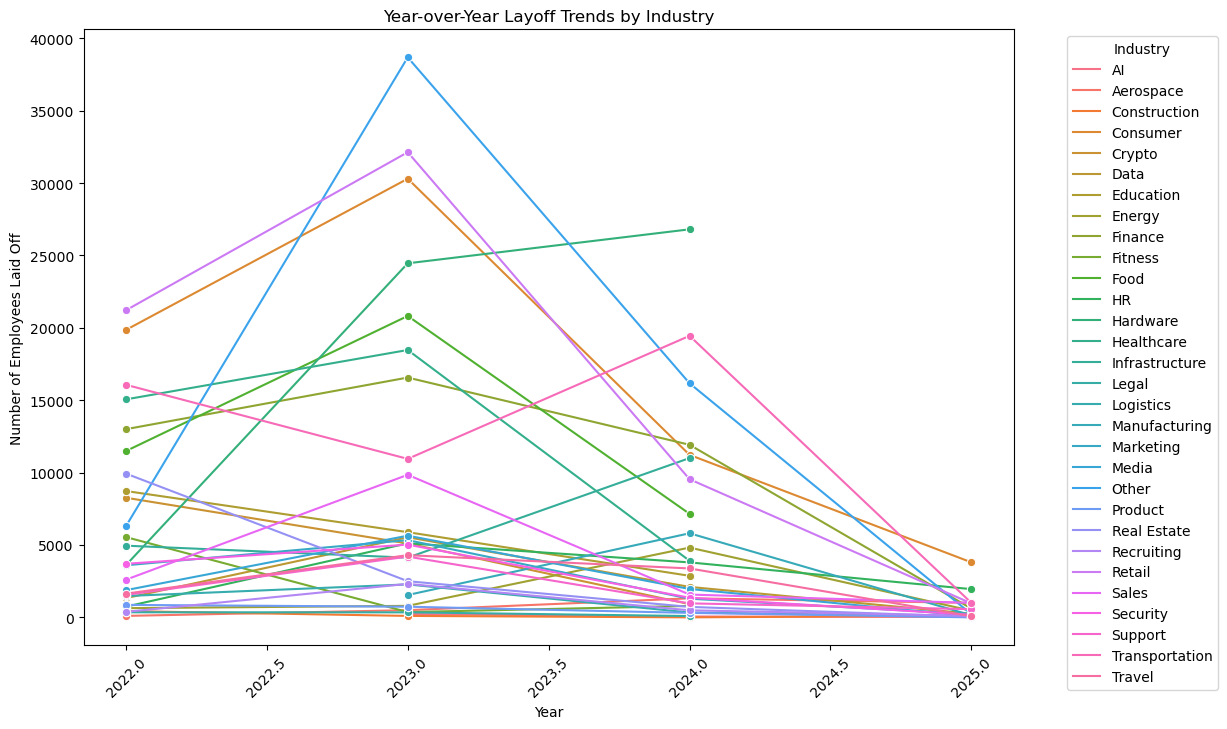

In [102]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=industry_trends, x="year", y="total_laid_off", hue="industry", marker="o")

plt.title("Year-over-Year Layoff Trends by Industry")
plt.xlabel("Year")
plt.ylabel("Number of Employees Laid Off")
plt.xticks(rotation=45)
plt.legend(title="Industry", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()